# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [92]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [93]:
with open('war_and_peace/tom_1.txt', 'r', encoding="utf-8") as f_1, \
    open('war_and_peace/tom_2.txt', 'r', encoding="utf-8") as f_2, \
    open('war_and_peace/tom_3.txt', 'r', encoding="utf-8") as f_3, \
    open('war_and_peace/tom_4.txt', 'r', encoding="utf-8") as f_4:
    text = f_1.read().lower() + f_2.read().lower() + f_3.read().lower() + f_4.read().lower()

In [94]:
text = re.sub('[^а-яё]', '', text)

In [95]:
# text = re.sub('\n', ' ', text)

In [96]:
# text = re.sub('\s+', ' ', text)

In [97]:
# text

In [98]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [99]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [100]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [101]:
# probabilities

In [102]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [103]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

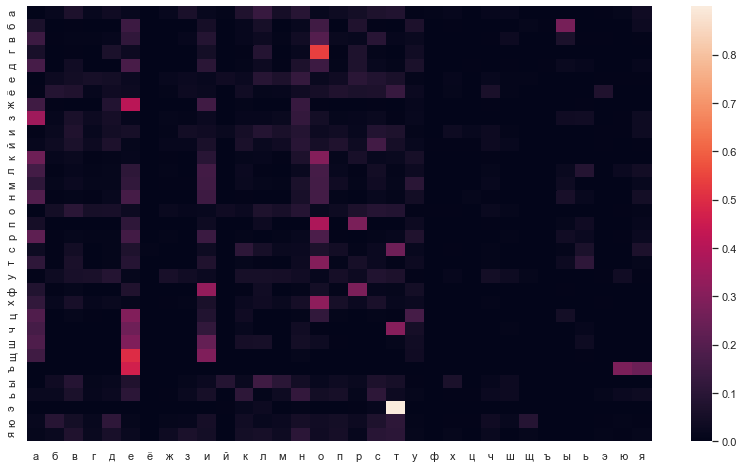

In [104]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [105]:
# df

In [106]:
# Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [107]:
# probabilities[start, POS['а']]

In [108]:
res = []
start = 'п'
end = 'р'
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    for d in RUSSIAN:
        proba = prior * probabilities[POS[start], POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], POS[end]]
#         if proba > 0:
#         print(''.join([start, c, d, end]), proba)
        res.append([''.join([start, c, d, end]), proba])

In [109]:
data = pd.DataFrame(res)

In [110]:
data.sort_values(1, ascending=False).head(30)

,0,1
566,прер,0.000132
511,попр,0.000107
576,прор,0.000103
561,прар,0.000088
514,потр,0.000052
499,подр,0.000048
498,погр,0.000045
496,побр,0.000042
500,поер,0.000035
181,пепр,0.000035


In [111]:
# Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [112]:
# def get_letter_and_prob(letter):   
#     p = POS[letter] 
#     prob = probabilities[p]
#     for s in list(RUSSIAN):
#         sp = POS[s]
#         yield s, prob[sp] 

In [113]:
def get_letter_and_prob(prev_letter):
    if prev_letter is None:
        for s in list(RUSSIAN):
            yield s, 1.0/len(RUSSIAN)
    else:
        p = POS[prev_letter] 
        prob = probabilities[p]
        for s in list(RUSSIAN):
            sp = POS[s]
            yield s, prob[sp] 

In [114]:
start_1 = 'б'

In [115]:
res_1 = []

In [116]:
# for s1, p1 in get_letter_and_prob(start_1):
#     for s2, p2 in get_letter_and_prob(s1):
#         for s3, p3 in get_letter_and_prob(s2):
#             for s4, p4 in get_letter_and_prob(s3):
#                 for s5, p5 in get_letter_and_prob(s4):
#                     for s6, p6 in get_letter_and_prob(s5):
#                         for s7, p7 in get_letter_and_prob(s6):
#                             prob = p1 * p2 * p3 * p4 * p5 * p6 * p7
#                             if prob > 0:
#                                 print(start_1+s1+s2+s3+s4+s5+s6+s7, prob)

In [117]:
for s1, p1 in get_letter_and_prob(start_1):
    for s2, p2 in get_letter_and_prob(s1):
        for s3, p3 in get_letter_and_prob(s2):
            for s4, p4 in get_letter_and_prob(s3):       
                    prob = p1 * p2 * p3 * p4
#                     if prob > 0:
#                         print(start_1+s1+s2+s3+s4, prob)
                    res_1.append([start_1+s1+s2+s3+s4, prob])

In [118]:
len(res_1)

1185921

In [119]:
data_1 = pd.DataFrame(res_1)

In [120]:
data_1.sort_values(1, ascending=False).head(50)

,0,1
1026480,бысто,0.001453
559299,босто,0.001047
1017739,быйст,0.000915
1019316,былал,0.000853
199929,бесто,0.000847
1019801,былов,0.000669
1017669,быйпо,0.000656
1026216,быско,0.000617
1011795,быего,0.000611
1019817,былос,0.000601
